### Data Preprocessing:

In [25]:
#Load the data into DataFrame 
import numpy as np
import pandas as pd 
df =pd.read_csv(r"C:\Users\anura\Desktop\d\Recommendation System\Recommendation System\anime.csv")
df

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [26]:
df.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [27]:
df.shape

(12294, 7)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [29]:
len(df.anime_id.unique())

12294

<Axes: >

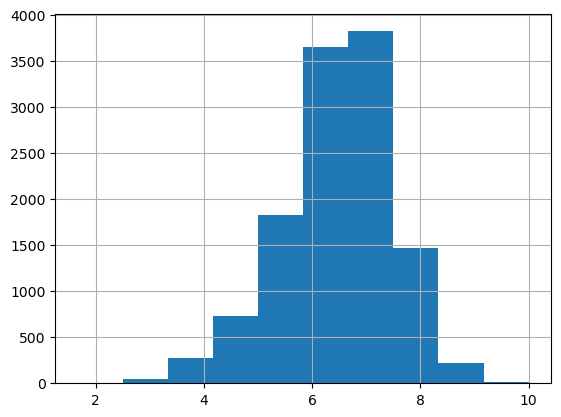

In [30]:
df['rating'].hist()

### Feature Extraction:

In [31]:
categorical_cols =df.select_dtypes(include =["object"]).columns
categorical_cols

Index(['name', 'genre', 'type', 'episodes'], dtype='object')

In [32]:
#lable encoding
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df["name_LE"] =LE.fit_transform(df['name'])
print(df["name_LE"])
df["genre_LE"]    =LE.fit_transform(df["genre"])
print(df["genre_LE"])
df["type_LE"]     =LE.fit_transform(df["type"])
print(df["type_LE"])
df["episodes_LE"] =LE.fit_transform(df["episodes"])
print(df["episodes_LE"])

0         5412
1         2848
2         3346
3        10259
4         3337
         ...  
12289    11144
12290    11418
12291    11562
12292    11563
12293    11904
Name: name_LE, Length: 12294, dtype: int32
0        2686
1         161
2         534
3        3240
4         534
         ... 
12289    2903
12290    2903
12291    2903
12292    2903
12293    2903
Name: genre_LE, Length: 12294, dtype: int32
0        0
1        5
2        5
3        5
4        5
        ..
12289    3
12290    3
12291    3
12292    3
12293    0
Name: type_LE, Length: 12294, dtype: int32
0          0
1        147
2        132
3         84
4        132
        ... 
12289      0
12290      0
12291    118
12292      0
12293      0
Name: episodes_LE, Length: 12294, dtype: int32


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   anime_id     12294 non-null  int64  
 1   name         12294 non-null  object 
 2   genre        12232 non-null  object 
 3   type         12269 non-null  object 
 4   episodes     12294 non-null  object 
 5   rating       12064 non-null  float64
 6   members      12294 non-null  int64  
 7   name_LE      12294 non-null  int32  
 8   genre_LE     12294 non-null  int32  
 9   type_LE      12294 non-null  int32  
 10  episodes_LE  12294 non-null  int32  
dtypes: float64(1), int32(4), int64(2), object(4)
memory usage: 864.6+ KB


In [34]:
X_count =df.iloc[:, 5:]
X_count

,rating,members,name_LE,genre_LE,type_LE,episodes_LE
0,9.37,200630,5412,2686,0,0
1,9.26,793665,2848,161,5,147
2,9.25,114262,3346,534,5,132
3,9.17,673572,10259,3240,5,84
4,9.16,151266,3337,534,5,132
...,...,...,...,...,...,...
12289,4.15,211,11144,2903,3,0
12290,4.28,183,11418,2903,3,0
12291,4.88,219,11562,2903,3,118
12292,4.98,175,11563,2903,3,0


In [35]:
#2.scaling /normalization -->It will also remove the units and adjust data in bln [0 to 1]
from sklearn.preprocessing import MinMaxScaler 
MM =MinMaxScaler()
MM_X =MM.fit_transform(X_count)
MM_X =pd.DataFrame(MM_X)
MM_X.columns =list(X_count)
MM_X

,rating,members,name_LE,genre_LE,type_LE,episodes_LE
0,0.924370,0.197872,0.440322,0.822917,0.000000,0.000000
1,0.911164,0.782770,0.231714,0.049326,0.833333,0.790323
2,0.909964,0.112689,0.272232,0.163603,0.833333,0.709677
3,0.900360,0.664325,0.834676,0.992647,0.833333,0.451613
4,0.899160,0.149186,0.271499,0.163603,0.833333,0.709677
...,...,...,...,...,...,...
12289,0.297719,0.000203,0.906680,0.889400,0.500000,0.000000
12290,0.313325,0.000176,0.928972,0.889400,0.500000,0.000000
12291,0.385354,0.000211,0.940688,0.889400,0.500000,0.634409
12292,0.397359,0.000168,0.940770,0.889400,0.500000,0.000000


### Recommendation System:

In [36]:
len(df.anime_id.unique())

12294

In [37]:
df['rating'].value_counts()

rating
6.00    141
7.00     99
6.50     90
6.25     84
5.00     76
       ... 
3.47      1
3.71      1
3.87      1
3.91      1
3.14      1
Name: count, Length: 598, dtype: int64

In [38]:
len(df.genre.unique())

3265

In [39]:
df.genre.unique()

array(['Drama, Romance, School, Supernatural',
       'Action, Adventure, Drama, Fantasy, Magic, Military, Shounen',
       'Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen',
       ..., 'Hentai, Sports', 'Drama, Romance, School, Yuri',
       'Hentai, Slice of Life'], dtype=object)

In [40]:
user_df =df.pivot(index ='anime_id', columns ='genre', values ='rating')
user_df

genre,NaN,Action,"Action, Adventure","Action, Adventure, Cars, Comedy, Sci-Fi, Shounen","Action, Adventure, Cars, Mecha, Sci-Fi, Shounen, Sports","Action, Adventure, Cars, Sci-Fi","Action, Adventure, Comedy","Action, Adventure, Comedy, Demons, Drama, Ecchi, Horror, Mystery, Romance, Sci-Fi","Action, Adventure, Comedy, Demons, Fantasy, Magic","Action, Adventure, Comedy, Demons, Fantasy, Magic, Romance, Shounen, Supernatural",...,Slice of Life,"Slice of Life, Space","Slice of Life, Supernatural",Space,Sports,"Super Power, Supernatural, Vampire",Supernatural,Thriller,Vampire,Yaoi
anime_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
#Imput those NaNs with 0 values 
user_df.fillna(0, inplace =True)
user_df

genre,NaN,Action,"Action, Adventure","Action, Adventure, Cars, Comedy, Sci-Fi, Shounen","Action, Adventure, Cars, Mecha, Sci-Fi, Shounen, Sports","Action, Adventure, Cars, Sci-Fi","Action, Adventure, Comedy","Action, Adventure, Comedy, Demons, Drama, Ecchi, Horror, Mystery, Romance, Sci-Fi","Action, Adventure, Comedy, Demons, Fantasy, Magic","Action, Adventure, Comedy, Demons, Fantasy, Magic, Romance, Shounen, Supernatural",...,Slice of Life,"Slice of Life, Space","Slice of Life, Supernatural",Space,Sports,"Super Power, Supernatural, Vampire",Supernatural,Thriller,Vampire,Yaoi
anime_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34514,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34519,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34522,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
#Calculating cosine similarity between users 

from sklearn.metrics import pairwise_distances
user_sim =1 - pairwise_distances(user_df.values, metric ='cosine')

In [43]:
user_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [45]:
np.fill_diagonal(user_sim, 0)

In [46]:
user_sim_df =pd.DataFrame(user_sim)
user_sim_df


,0,1,2,3,4,5,6,7,8,9,...,12284,12285,12286,12287,12288,12289,12290,12291,12292,12293
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12289,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12290,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
12291,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12292,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
#set the index and column names to user ids 

user_sim_df.index   =df.anime_id.unique()
user_sim_df.columns =df.anime_id.unique()
user_sim_df

,32281,5114,28977,9253,9969,32935,11061,820,15335,15417,...,26031,34399,10368,9352,5541,9316,5543,5621,6133,26081
32281,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28977,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9253,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9969,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9316,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5543,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5621,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6133,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
user_sim_df.idxmax(axis =1)[0:10]

32281     8800
5114     32281
28977      868
9253     32281
9969     12413
32935    30296
11061    32281
820      29283
15335      264
15417    32281
dtype: int64

In [49]:
df[(df['anime_id'] ==3) | (df['anime_id'] ==10000)]

,anime_id,name,genre,type,episodes,rating,members,name_LE,genre_LE,type_LE,episodes_LE
8526,10000,Esper Mami Special: My Angel Mami-chan,"Comedy, Super Power, Supernatural",Special,1,6.52,148,2615,2354,4,0


In [50]:
df[(df['anime_id'] ==299) | (df['anime_id'] ==1500)]

,anime_id,name,genre,type,episodes,rating,members,name_LE,genre_LE,type_LE,episodes_LE
4351,299,.hack//Liminality,"Game, Mystery, Sci-Fi",OVA,4,6.74,24304,12,2877,3,118
5634,1500,Teizokurei Daydream,"Comedy, Drama, Ecchi, Horror, Supernatural",OVA,4,6.40,5305,10657,1715,3,118


### Evaluation:

In [51]:
Y =df["type"]

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test =train_test_split(X_count,Y, test_size =0.2)

In [54]:
import pandas as pd
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score



# For this example, we'll use a content-based approach to recommend the most popular anime
# Create a list of anime IDs (as there are no ratings in this case)
anime_list = df['anime_id'].tolist()

# Simple popularity-based recommendation (based on anime_id frequency, assuming a large number of users)
def get_top_n_recommendations(n=10):
    # Recommend the top N anime (most popular) based on anime ID count or some heuristic
    # In this case, simply recommend the first N anime as a placeholder
    return df['anime_id'].head(n).tolist()

# Evaluation (although without user ratings, precision/recall/F1 is not meaningful in the traditional sense)
precision_list, recall_list, f1_list = [], [], []

# Assume we have some form of test set of actual anime IDs users are interested in
# For simplicity, let's say we know the top anime IDs users would have rated, even though we don't have ratings
# This is just for demonstration and may not work without actual user interaction data
for user in range(1, 11):  # For demonstration, assume 10 users
    actual = [anime for anime in anime_list if anime % 2 == user % 2]  # Dummy "actual" anime list (for demo)
    predicted = get_top_n_recommendations(n=10)
    
    if len(set(actual)) == 0 or len(set(predicted)) == 0:
        continue

    tp = len(set(actual) & set(predicted))
    precision = tp / len(predicted) if len(predicted) > 0 else 0
    recall = tp / len(actual) if len(actual) > 0 else 0
    
    # Calculate F1-Score
    if precision + recall > 0:
        f1 = 2 * precision * recall / (precision + recall)
    else:
        f1 = 0

    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

# Output the final average metrics
print(f"Precision: {np.mean(precision_list):.4f}")
print(f"Recall: {np.mean(recall_list):.4f}")
print(f"F1-Score: {np.mean(f1_list):.4f}")


Precision: 0.5000
Recall: 0.0007
F1-Score: 0.0015


### Interview Questions:

In [56]:
print('''1.Can you explain the difference between user-based and item-based collaborative filtering?
1. User-Based Collaborative Filtering
Idea:
Recommend items to a user based on what similar users liked.

How it works:

Find users similar to the target user based on past behavior (e.g., ratings, clicks, purchases).

Recommend items that those similar users liked but the target user hasn’t interacted with yet.

Example:

If User A and User B both liked Movie 1 and Movie 2, and User A also liked Movie 3, then recommend Movie 3 to User B.

Pros:

Personal and intuitive.

Works well when user tastes are clearly grouped.

Cons:

Doesn’t scale well with a large number of users.

Performance drops when user-item interactions are sparse.

2. Item-Based Collaborative Filtering
Idea:
Recommend items that are similar to what the user has liked.

How it works:

Find items similar to those the target user has interacted with.

Recommend the most similar items.

Example:

If a user liked Movie A, and Movie A is similar to Movie B (because many users liked both), then recommend Movie B.

Pros:

Scales better than user-based methods.

Item similarity is more stable over time.

Cons:

Might miss novel or diverse recommendations.

Assumes that similar items will always satisfy user preferences.''')

1.Can you explain the difference between user-based and item-based collaborative filtering?
1. User-Based Collaborative Filtering
Idea:
Recommend items to a user based on what similar users liked.

How it works:

Find users similar to the target user based on past behavior (e.g., ratings, clicks, purchases).

Recommend items that those similar users liked but the target user hasn’t interacted with yet.

Example:

If User A and User B both liked Movie 1 and Movie 2, and User A also liked Movie 3, then recommend Movie 3 to User B.

Pros:

Personal and intuitive.

Works well when user tastes are clearly grouped.

Cons:

Doesn’t scale well with a large number of users.

Performance drops when user-item interactions are sparse.

2. Item-Based Collaborative Filtering
Idea:
Recommend items that are similar to what the user has liked.

How it works:

Find items similar to those the target user has interacted with.

Recommend the most similar items.

Example:

If a user liked Movie A, and Movie

In [57]:
#2.What is collaborative filtering, and how does it work?
print('''
-->Collaborative Filtering is a popular technique used in recommendation systems to suggest items (like movies, products, books)
   to users based on past interactions — without needing any item content or user profile.

-->How Does Collaborative Filtering Work?

The core idea:
"Users who agreed in the past will agree in the future."
"Items that were liked together will be liked together again."

Collaborative filtering works by finding patterns in user-item interactions (such as ratings, purchases, clicks), typically organized in a user-item matrix.
''')


-->Collaborative Filtering is a popular technique used in recommendation systems to suggest items (like movies, products, books)
   to users based on past interactions — without needing any item content or user profile.

-->How Does Collaborative Filtering Work?

The core idea:
"Users who agreed in the past will agree in the future."
"Items that were liked together will be liked together again."

Collaborative filtering works by finding patterns in user-item interactions (such as ratings, purchases, clicks), typically organized in a user-item matrix.

